# Первая практическая работа

Задачи:
- Генерация выборки (подбор готового датасета);
- Расчет выборочных характеристик;
- Визуальный анализ данных;
- Преобразование данных.

## Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

## Датасет

Датасет содержит данные об открытых экзопланетах. Данные были первоначально собраны и продолжают обновляться Ханно Рейном в открытом репозитории [OpenExoplanetCatalogue](https://github.com/OpenExoplanetCatalogue/open_exoplanet_catalogue).

In [39]:
data = pd.read_csv("dataset/oec.csv", delimiter=",")

In [40]:
data.head()

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.6,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.0,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial


In [41]:
data.columns

Index(['PlanetIdentifier', 'TypeFlag', 'PlanetaryMassJpt', 'RadiusJpt',
       'PeriodDays', 'SemiMajorAxisAU', 'Eccentricity', 'PeriastronDeg',
       'LongitudeDeg', 'AscendingNodeDeg', 'InclinationDeg', 'SurfaceTempK',
       'AgeGyr', 'DiscoveryMethod', 'DiscoveryYear', 'LastUpdated',
       'RightAscension', 'Declination', 'DistFromSunParsec',
       'HostStarMassSlrMass', 'HostStarRadiusSlrRad', 'HostStarMetallicity',
       'HostStarTempK', 'HostStarAgeGyr', 'ListsPlanetIsOn'],
      dtype='object')

In [42]:
data.shape

(3584, 25)

## Описание датасета

Всего 3584 объекта, 25 признаков (если считать идентификатор):
1. PlanetIdentifier - идентификатор планеты
2. TypeFlag - тип звездной системы:
    - 0 - одиночная звезда
    - 1 - двойная система P-типа (подробнее по [типам](https://ru.wikipedia.org/wiki/Жизнь_у_двойных_звёзд))
    - 2 - двойная система S-типа 
    - 3 - планета-сирота
3. PlanetaryMassJpt - оценочная масса планеты в массах Юпитера
4. RadiusJpt - оценочный радиус планеты в радиусах Юпитера
5. PeriodDays - период обращения вокруг звезды
6. SemiMajorAxisAU - Большая полуось орбиты планеты в астрономических единицах
7. Eccentricity - Эксцентриситет орбиты
8. PeriastronDeg - Периастр в градусах
9. LongtitudeDeg - Долгота в градусах
10. AscendingNodeDeg - [Восходящий узел](https://ru.wikipedia.org/wiki/Узел_орбиты) в градусах
11. InclinationDeg -  Наклонение орбиты в градусах
12. SurfaceTempK - Температура на поверхности
13. AgeGyr - Возраст в годах * 10^9
14. DiscoveryMethod - Метод, с помощью которого открыли планету
15. DiscoveryYear - Год открытия
16. LastUpdated - Дата последнего обновления данных
17. RightAscension - [Прямое восхождение](https://ru.wikipedia.org/wiki/Прямое_восхождение)
18. Declination - [Склонение](https://ru.wikipedia.org/wiki/Склонение_(астрономия))
19. DistFromSunParsec - Расстояние от Солнца в парсеках (3,2616 световых лет)
20. HostStarMassSlrMass - Масса родительской звезды в массах Солнца
21. HostStarRadiusSlrRad - Радиус родительской звезды в радиусах Солнца
22. HostStarMetallicity - [Металличность](https://ru.wikipedia.org/wiki/Металличность) родительской звезды (логарифмическое отношение к солнечной)
23. HostStarTempK - Температура родительской звезды в кельвинах
24. HostStarAgeGyr - Возраст родительсокй звезды в годах * 10^9
25. ListsPlanetIsOn - Список статусов планеты

Константы:

Масса Юпитера: 1.8991766e+27 кг

Масса Солнца: 1.9891e+30 кг

Радиус Юпитера: 69911000 м

Радиус Солнца: 6.96e+08 м

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3584 non-null   object 
 1   TypeFlag              3584 non-null   int64  
 2   PlanetaryMassJpt      1313 non-null   float64
 3   RadiusJpt             2774 non-null   float64
 4   PeriodDays            3485 non-null   float64
 5   SemiMajorAxisAU       1406 non-null   float64
 6   Eccentricity          1108 non-null   float64
 7   PeriastronDeg         328 non-null    float64
 8   LongitudeDeg          43 non-null     float64
 9   AscendingNodeDeg      46 non-null     float64
 10  InclinationDeg        665 non-null    float64
 11  SurfaceTempK          741 non-null    float64
 12  AgeGyr                2 non-null      float64
 13  DiscoveryMethod       3521 non-null   object 
 14  DiscoveryYear         3574 non-null   float64
 15  LastUpdated          

## Расчет выборочных характеристик

In [44]:
data.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,3584.000000,1313.000000,2774.000000,3485.000000,1406.000000,1108.000000,328.000000,43.000000,46.000000,665.000000,741.000000,2.000000,3574.000000,2133.000000,3416.000000,3263.000000,2509.000000,3455.000000,517.000000
mean,0.097656,2.890944,0.371190,537.248317,2.000170,0.166910,150.363823,144.200847,90.624476,82.973840,871.714170,1.502750,2013.300504,554.912346,0.983225,1.495629,0.016228,5505.514501,4.635355
std,0.424554,10.204485,0.416871,7509.660676,19.352699,0.189760,117.859945,127.865952,93.047968,21.402768,699.314463,2.117431,6.159674,847.566803,0.319063,3.071298,0.193495,1204.271777,4.657679
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-174.640000,-5.112604,-0.000543,102.200000,0.005500,1781.000000,1.295000,0.012000,0.000014,-2.090000,540.000000,0.002200
25%,0.000000,0.150000,0.141062,4.757940,0.053000,0.020000,66.750000,37.167396,1.509500,85.058000,321.800000,0.754125,2013.000000,60.000000,0.830000,0.810000,-0.050000,5113.000000,2.000000
50%,0.000000,0.940000,0.209600,13.071630,0.169500,0.100000,139.700000,162.280000,69.821251,87.800000,719.600000,1.502750,2014.000000,333.000000,0.977000,1.000000,0.020000,5634.000000,4.000000
75%,0.000000,2.500000,0.321518,49.514000,1.250000,0.247282,243.000000,252.625834,169.175000,89.140000,1310.900000,2.251375,2016.000000,773.130000,1.105000,1.250000,0.100000,5940.000000,6.300000
max,3.000000,263.000000,6.000000,320000.000000,662.000000,0.956000,791.000000,339.300000,320.800000,305.000000,7112.000000,3.000000,2017.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,80.000000


In [104]:
np.nanmean(data['RadiusJpt'])

0.3711896948449642

In [105]:
np.nanvar(data['RadiusJpt'])

0.1737186488547459

In [107]:
np.nanmedian(data['RadiusJpt'])

0.2096

In [109]:
np.nanstd(data['RadiusJpt'])

0.41679569198199

## Графический анализ данных

Создади категориальную переменную на основе "TypeFlag", для более удобного восприятия типа родительской звезды

In [45]:
def system_type_classify(row):
    if row.TypeFlag == 0:
        return "Одиночная звезда"
    if row.TypeFlag == 1:
        return "Двойная звезда P-типа"
    if row.TypeFlag == 2:
        return "Двойная звезда S-типа"
    return "Планета-сирота"
type_ = data.apply(system_type_classify, axis="columns")
print(type_.value_counts())

Одиночная звезда         3396
Двойная звезда S-типа     156
Двойная звезда P-типа      29
Планета-сирота              3
dtype: int64


In [79]:
data["SystemType"] = type_

Большинство планет находят у одиночных звезд:

<AxesSubplot:ylabel='SystemType'>

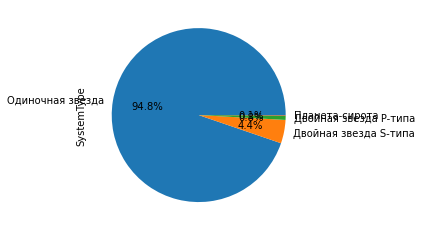

In [93]:
data["SystemType"].value_counts().plot.pie(autopct='%1.1f%%')

Абсолютное большинство экзопланет находятся с помощью двух методов:

<AxesSubplot:ylabel='DiscoveryMethod'>

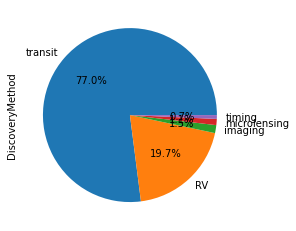

In [92]:
data["DiscoveryMethod"].value_counts().plot.pie(autopct='%1.1f%%')

Распределение найденных планет по удаленности от Солнечной системы:

<Figure size 720x1080 with 0 Axes>

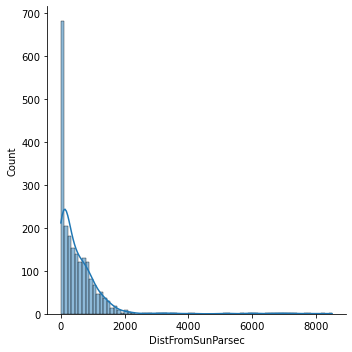

In [47]:
plt.figure(figsize=(10, 15))
sns.displot(data["DistFromSunParsec"], kde=True)

Распределение двух самых популярных методов поиска по годам:

C:\Users\igork\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\igork\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


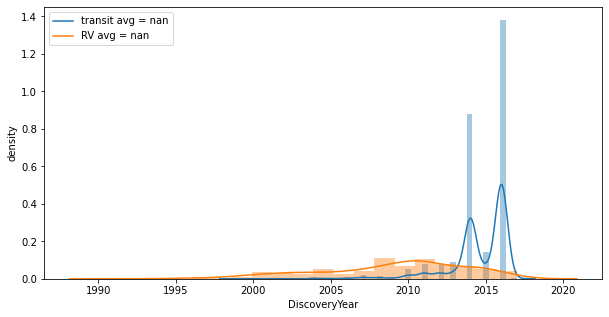

In [73]:
plt.figure(figsize=(10,5))
sns.distplot(data["DiscoveryYear"][data["DiscoveryMethod"]=='transit'], label="transit")
sns.distplot(data["DiscoveryYear"][data["DiscoveryMethod"]=='RV'], label="RV")
plt.ylabel("density")
plt.legend(('transit avg = '+ str(np.round(np.mean(data["DiscoveryYear"][data["DiscoveryMethod"]==0]),2)),
            'RV avg = ' + str(np.round(np.mean(data["DiscoveryYear"][data["DiscoveryMethod"]==1]),2))))
plt.show()

Вывод: Транзитивный метод поиска экзопланет начал преобладать над методом Доплеровской спектроскопии в серидине 2010-х годов.

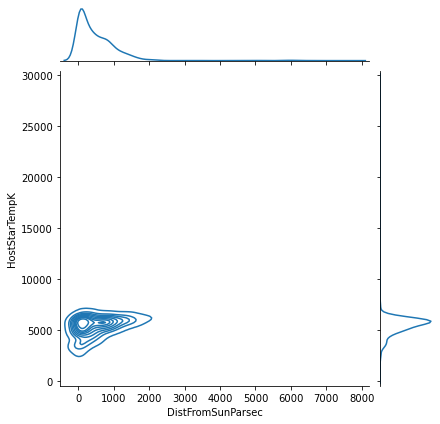

In [101]:
sns.jointplot(x=data['DistFromSunParsec'], y=data['HostStarTempK'], kind="kde", dropna=True)

Вывод: Чем дальше находится планета, тем труднее её найти. Поэтому самые дальние планеты находят у звезд с наибольшей светимостью.

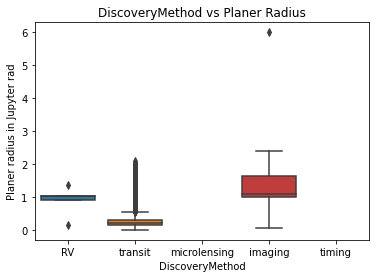

In [114]:
plt.title("DiscoveryMethod vs Planer Radius")
ax = sns.boxplot(x="DiscoveryMethod", y="RadiusJpt", data=data)
plt.ylabel("Planer radius in Jupyter rad")
plt.show()

Вывод: Каждый метод имеет свои границы применимости при поиске экзопланет.

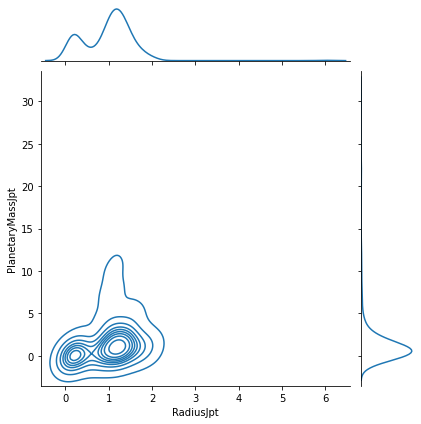

In [98]:
sns.jointplot(x=data['RadiusJpt'], y=data['PlanetaryMassJpt'], kind='kde', dropna=True)

Вывод: Планеты похожие на Землю найти сложнее.

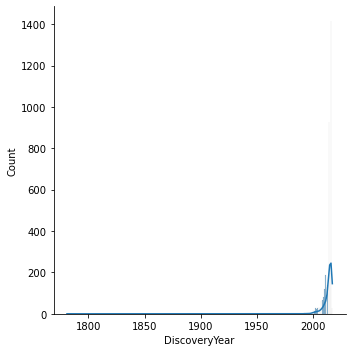

In [118]:
sns.displot(data["DiscoveryYear"], kde=True)

Вывод: Что не удивительно, экзопланеты активно начали открывать после 1990-х, что можно связать с запуском космического телескопа Кеплер.